In [1]:
#import modules and set path/connection to the Pewlett Hackard employee database
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('postgresql://postgres:<password>@localhost:5432/pew_hack_emp_db')
connection = engine.connect()



In [2]:
#collect all of the salaries in the salaries table in the Pewlett Hackard employee database
sal = []

salaries = engine.execute("select salary from salaries;")
for salary in salaries:
    sal.append(salary[0])


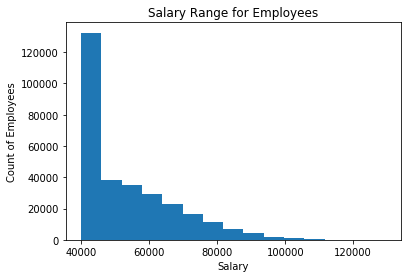

In [3]:
#create Histogram for the salary ranges for all employees
plt.hist(sal, 15)
plt.title('Salary Range for Employees')
plt.xlabel('Salary')
plt.ylabel('Count of Employees')
plt.show()


In [4]:
#collect the average salaries of employees with title using tables: titles, salaries, employees in the Pewlett Hackard employee database
avg_sal_by_title_df = pd.read_sql(
    ''' 
    select c.title , round(avg(a.salary),2) as avg_sal
    from salaries a
    join employees b
        on (a.emp_no = b.emp_no)
    join titles c
        on (b.emp_title_id = c.title_id)
    group by title
    ;
    ''',
    connection
    )


In [5]:
#set index to title and display the dataframe
avg_sal_by_title_df = avg_sal_by_title_df.set_index("title")
avg_sal_by_title_df


,avg_sal
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


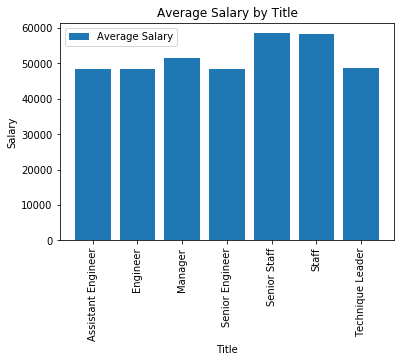

In [6]:

plt.bar(avg_sal_by_title_df.index,avg_sal_by_title_df["avg_sal"], label="Average Salary")
plt.xticks( rotation="vertical")
plt.title("Average Salary by Title")
plt.legend(loc="upper left")
plt.xlabel("Title")
plt.ylabel("Salary")
plt.show()
